In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [2]:
irisdata = pd.read_csv('iris.csv')
irisdata

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(irisdata.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


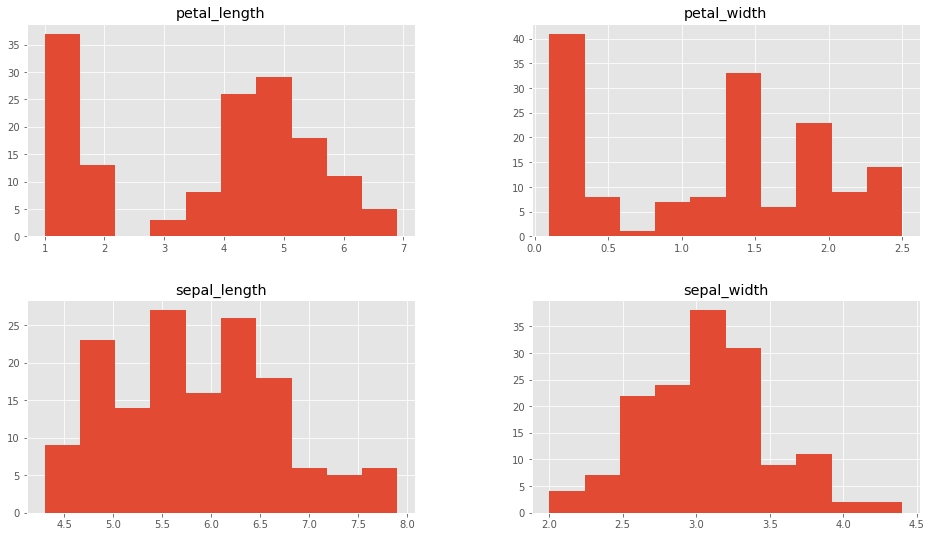

In [4]:
irisdata.drop(['class'], axis=1).hist()
plt.show()

In [6]:
x=irisdata.drop(['class'], axis=1)
y=irisdata['class']
 
best=SelectKBest(k='all')
X_new = best.fit_transform(x, y)
X_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


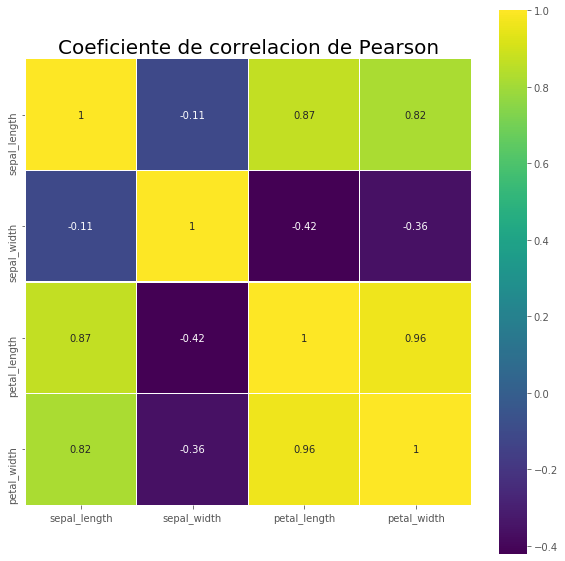

In [9]:
used_features =x.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Coeficiente de correlacion de Pearson', y=1, size=20)
sb.heatmap(irisdata[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [10]:
print("Gaussian Naive Bayes")
X_train, X_test = train_test_split(irisdata, test_size=0.3, random_state=7) 
y_train =X_train["class"]
y_test = X_test["class"]

Gaussian Naive Bayes


In [11]:
# Instancias el clasificador
gnb = GaussianNB()
# clasificador de entrenamiento
gnb.fit(
    X_train[used_features].values,
    y_train
)

y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.98
Precisión en el set de Test: 0.89


In [12]:
#predecir
print(gnb.predict([[5.1,3.5,1.4,1],[2,65,70,1],[5.4,3,4,0],[3,7,9,0]]))

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica']


In [14]:
print(gnb.predict([[5,20,15,20]]))

['Iris-virginica']
